<a href="https://colab.research.google.com/github/dynnskiee/DATMIN/blob/main/pertemuan2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pertemuan 2 - Data Understanding

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

Data Collection

In [ ]:
df = sns.load_dataset('titanic')

Describing Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


Kolom Survived
- Memiliki 891 baris
- dengan tipe data integer, isinya 0 dan 1

Kolom pclass
- Memiliki 891 baris
- dengan tipe data integer yang beragam
dst..

EDA

In [11]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Survived
- Mean = 0.383838


Insight
Rata-rata umur penumpang kapal titanic 29 tahun

Inferential Stats

In [18]:
# Korelasi Pearson
# df.corr(numeric_only=True)
px.imshow(df.corr(numeric_only=True))
# Korelasi Kendall
# df.corr(numeric_only=True)

# #Korelasi Spearman
# df.corr(numeric_only=True)

Korelasi anatar kolom Survived dan Age tidak ada keterkaitan karena korelasi yang dihasilkan sebesar -0.07

# Plotting

In [23]:
gender_counts = df['sex'].value_counts()
gender_counts

male      577
female    314
Name: sex, dtype: int64

<Axes: ylabel='sex'>

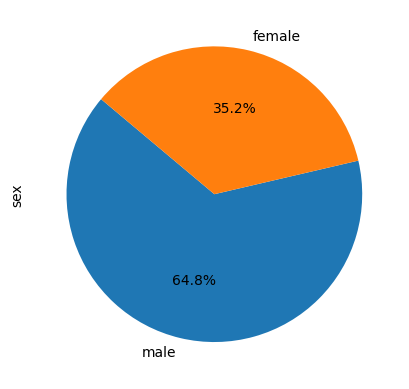

In [24]:
gender_counts.plot(kind='pie',
                   autopct='%1.1f%%',
                   startangle=140)

Dapat dilihat dari visualisasi di atas meberikan informasi bahwa penumpang kapal titanic mayoritas-nya adalah pria

Text(0.5, 0, 'Umur anggota')

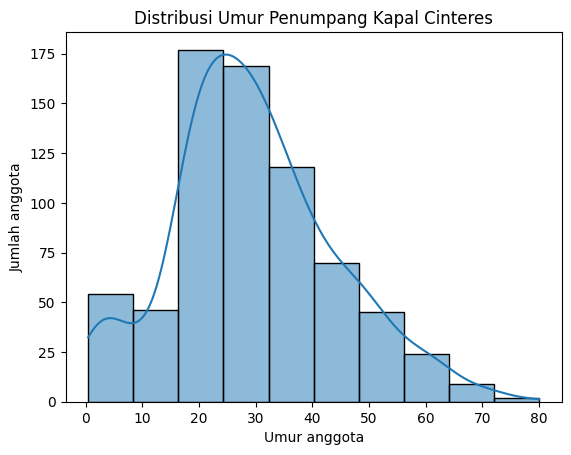

In [30]:
sns.histplot(df['age'].dropna(), bins=10, kde=True)
plt.title('Distribusi Umur Penumpang Kapal Cinteres')
plt.ylabel('Jumlah anggota')
plt.xlabel('Umur anggota')

Dapat dilihat bahwa persebaran data umur penumpang berdistribusi normal

Tiket mana aja sih yang paling laku?

<ipython-input-33-e4b22be1f627>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0, 0.5, 'Jumlah Penumpang')

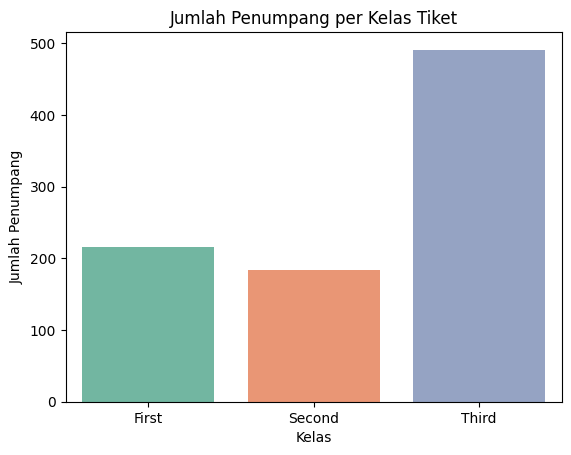

In [33]:
sns.countplot(x= 'class', data=df, palette= 'Set2')
plt.title('Jumlah Penumpang per Kelas Tiket')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Penumpang')

Dapat dilihat dari....

<ipython-input-34-14fc2f4df508>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Boxplot antar class dan juga fare')

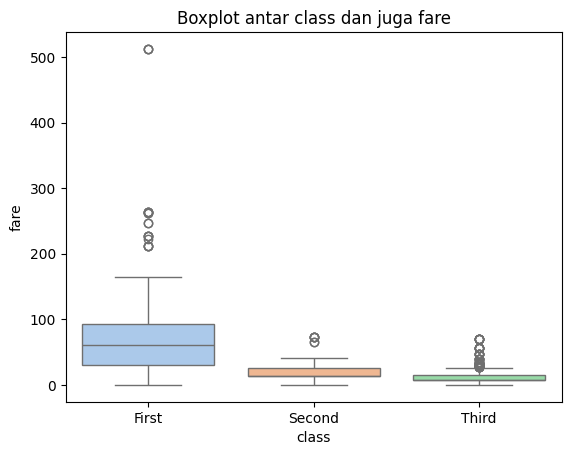

In [34]:
sns.boxplot(x='class', y='fare', data=df, palette='pastel')
plt.title('Boxplot antar class dan juga fare')

dapat dilihat....

# Verify Data Quality

In [36]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['null ratio in %'])

,null ratio in %
survived,0.000000
pclass,0.000000
sex,0.000000
age,19.865320
sibsp,0.000000
parch,0.000000
fare,0.000000
embarked,0.224467
class,0.000000
who,0.000000


In [38]:
df[df.duplicated()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
47,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True
76,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
77,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
87,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
95,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,0,3,male,26.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
877,0,3,male,19.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
